# Data Cleansing and Preprocessing in Python

1. Data Cleansing
    * Missing Value Handling
    * Duplication Handling
    * Anomaly and Outlier Handling
    * Data Type Checking
2. Data Preprocessing
    * Categorical Data Encoding
    * Numerical Data Scaling
    * Feature Selection
    * Feature Extraction
    

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import re

# Import Data

In [2]:
df = pd.read_csv('Uncleaned_DS_jobs.csv')

# Initial EDA

In [3]:
# Display the first 5 rows
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
# Display the last 5 rows
df.tail()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1
671,671,Data Scientist,$105K-$167K (Glassdoor est.),Description\n\nThe Data Scientist will be part...,2.7,1-800-Flowers\n2.7,"New York, NY","Carle Place, NY",1001 to 5000 employees,1976,Company - Public,Wholesale,Business Services,$1 to $2 billion (USD),-1


In [5]:
# Display 5 random rows
df.sample(5)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
237,237,Data Scientist,$71K-$123K (Glassdoor est.),Who we are\n\n\nFueled by a fundamental belief...,3.8,PayPal\n3.8,Texas,"San Jose, CA",10000+ employees,1998,Company - Public,Internet,Information Technology,$10+ billion (USD),"Square, Amazon, Apple"
182,182,Sr. Data Scientist II,$56K-$97K (Glassdoor est.),Data Scientist\n\nBefore the dawn of everythin...,3.5,Argo Group US\n3.5,"New York, NY","Hamilton, Bermuda",1001 to 5000 employees,1948,Company - Public,Insurance Carriers,Insurance,$1 to $2 billion (USD),-1
311,311,"Health Plan Data Analyst, Sr",$145K-$225K(Employer est.),"Title: Health Plan Data Analyst, Sr\n\nCook Ch...",3.8,Cook Children's Health Care System\n3.8,"Fort Worth, TX","Fort Worth, TX",5001 to 10000 employees,1918,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$100 to $500 million (USD),"Children's Health, Texas Health Resources, Bay..."
233,233,Operations Data Analyst,$71K-$123K (Glassdoor est.),"Req Id: 2756\nJob location: Charlotte, NC, US,...",3.8,Brighthouse Financial\n3.8,"Charlotte, NC","Charlotte, NC",1001 to 5000 employees,2017,Company - Public,Insurance Carriers,Insurance,Unknown / Non-Applicable,-1
488,488,Data Scientist,$95K-$119K (Glassdoor est.),WHAT WE DO MATTERS:\n\nHere at The Knot Worldw...,3.5,The Knot Worldwide\n3.5,"Washington, DC","Chevy Chase, MD",1001 to 5000 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,Zola Registry


In [6]:
# Get the dataframe's info
# (number of rows, column name & type, number of missing rows per column, memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


# Data Cleansing

## Missing Values Handling

The type of missing value checked by pandas `.info()` method is only when the value is `NaN`. However, as we can see from the `.head()`, `.tail()` and `.sample(5)` outputs, there are `-1` in several rows and columns. Those are also missing values, but instead of `NaN` the value is filled with `-1`.

In [7]:
# Print all rows that has -1 in atleast one of the columns
df[df.isin(['-1',-1]).any(axis=1)]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
5,5,Data Scientist,$137K-$171K (Glassdoor est.),About Us:\n\nHeadquartered in beautiful Santa ...,4.2,HG Insights\n4.2,"Santa Barbara, CA","Santa Barbara, CA",51 to 200 employees,2010,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
6,6,Data Scientist / Machine Learning Expert,$137K-$171K (Glassdoor est.),Posting Title\nData Scientist / Machine Learni...,3.9,Novartis\n3.9,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1
7,7,Data Scientist,$137K-$171K (Glassdoor est.),Introduction\n\nHave you always wanted to run ...,3.5,iRobot\n3.5,"Bedford, MA","Bedford, MA",1001 to 5000 employees,1990,Company - Public,Consumer Electronics & Appliances Stores,Retail,$1 to $2 billion (USD),-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


But how can we be sure that -1 is the only value that correspond to missing values in this dataset?

In [8]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= index =================


,count
index,
655,1
654,1
653,1
652,1
651,1
...,...
4,1
3,1
2,1



============= Job Title =================


,count
Job Title,
Data Scientist,337
Data Engineer,26
Senior Data Scientist,19
Machine Learning Engineer,16
Data Analyst,12
...,...
"Sr. Research Associate/ Scientist, NGS prep & Molecular Genomics",1
Developer III - Data Science,1
Hydrogen/Tritium Materials Scientist (Experienced),1



============= Salary Estimate =================


,count
Salary Estimate,
$75K-$131K (Glassdoor est.),32
$79K-$131K (Glassdoor est.),32
$99K-$132K (Glassdoor est.),32
$137K-$171K (Glassdoor est.),30
$90K-$109K (Glassdoor est.),30
$56K-$97K (Glassdoor est.),22
$90K-$124K (Glassdoor est.),22
$79K-$106K (Glassdoor est.),22
$101K-$165K (Glassdoor est.),21



============= Job Description =================


Job Description
Job Overview: The Data Scientist is a key member of our cross-functional Product team responsible for discovering new and innovative solutions to the challenges within the built environment. Now, more than ever, building owners and operators rely on Hatch Data to get a birds-eye view of asset performance to help them achieve ambitious goals around sustainable financial, environmental, and social impact. We are actively seeking an exceptional Data Scientist to help us take one of the worlds most extensive data sets for commercial building operations and transform it into amazing products for our customers.\n\nResponsibilities and Duties:\nPartner with Product Management, to Investigate high-level questions to discover new relationships between operations and outcomes\nMaintain and improve upon the accuracy and utility of existing machine-learning algorithms\nOwn the long-term Data Science Roadmap, including prototype solutions in "green field" problem spaces\nSupport ad-hoc data analysis in support of customer success and marketing efforts\nCollaborate closely with domain experts in energy and mechanical engineering, as well as with the software engineering team\nCoach and mentor others to amplify your impact and continuously demonstrate the value of data science\nExperience:\nBachelors degree in Data Science, Computer Science, Math, or related technical field.\nMinimum 3+ years experience applying data science techniques to drive product development and decision-making.\nDemonstrated track record of solving problems in industry with machine learning\nExpertise in statistical methods and experimental design and analysis\nFluent in at least one modern language for data processing (R, Python, and Scala experience ideal).\nComfortable with AWS and distributed data processing systems (e.g., Spark)\nFamiliarity with energy-efficiency, commercial building domain, regression and baseline techniques, weather normalization, etc. a plus\nExperience using APIs to manipulation and move data in and out of systems.\nMust possess outstanding written and verbal communication skills in English.\nAbility to prioritize development and operational tasks in a dynamic and challenging environment.\nAbout You:\nCare about leaving the world better than you found it.\nMission-driven and leads by example with equal parts brain and heart.\nOperationally-minded, empathetic, self-starter, driven, and gets things done.\nNatural communicator that instills confidence and trust with internal and external stakeholders.\nExcited to join a small company, with big company benefits, and upside potential.\nIdeally based in the San Francisco Bay Area.\nAbout Us:\n\nClimate change is real. Addressing this is the biggest issue of our time. While moving the world from dirty energy sources to clean ones matters, there is also an enormous opportunity to use existing resources more efficiently. Buildings consume up to 40% of the energy in North America alone. This is a big opportunity to create change. We bring our values to work and every day push to solve these problems at scale.\n\nOur team applies their knowledge of energy systems, mechanical engineering, IoT, machine learning and the built environment, to design cutting edge software that reduces the negative environmental impact of our indoor spaces while improving the bottom line for owners and operators. Our software platform has been proven across more than 400M square feet of commercial real estate with marquee customers, and were doubling down our efforts in the coming months as we prepare to accelerate growth and impact.\n\nThis is a unique opportunity to join a company that does well by doing good and is positioned for significant expansion. Youll enjoy comprehensive benefits, competitive salary, and meaningful equity. We offer a flexible work environment and the opportunity to work alongside an incredibly talented, fun, and highly motivated team.\n\nHow to Apply:\n\nDoes this sound like you? If


============= Rating =================


,count
Rating,
3.5,58
-1.0,50
3.3,41
4.0,41
3.9,40
3.8,39
3.7,38
5.0,36
4.5,32



============= Company Name =================


,count
Company Name,
Hatch Data Inc,12
Maxar Technologies\n3.5,12
Tempus Labs\n3.3,11
AstraZeneca\n4.0,10
Klaviyo\n4.8,8
...,...
1010data\n3.1,1
Predictive Research Inc\n3.9,1
PayPal\n3.8,1



============= Location =================


,count
Location,
"San Francisco, CA",69
"New York, NY",50
"Washington, DC",26
"Boston, MA",24
"Chicago, IL",22
...,...
"Redmond, WA",1
"West Chester, PA",1
"Quantico, VA",1



============= Headquarters =================


,count
Headquarters,
"New York, NY",33
"San Francisco, CA",31
-1,31
"Chicago, IL",23
"Boston, MA",19
...,...
"Oakville, Canada",1
"San Bruno, CA",1
"West Chester, PA",1



============= Size =================


,count
Size,
51 to 200 employees,135
1001 to 5000 employees,104
1 to 50 employees,86
201 to 500 employees,85
10000+ employees,80
501 to 1000 employees,77
5001 to 10000 employees,61
-1,27
Unknown,17



============= Founded =================


,count
Founded,
-1,118
2012,34
2011,25
1999,22
2015,22
...,...
1977,1
1896,1
1972,1



============= Type of ownership =================


,count
Type of ownership,
Company - Private,397
Company - Public,153
Nonprofit Organization,36
Subsidiary or Business Segment,28
-1,27
Government,10
Other Organization,5
Private Practice / Firm,4
Unknown,4



============= Industry =================


,count
Industry,
-1,71
Biotech & Pharmaceuticals,66
IT Services,61
Computer Hardware & Software,57
Aerospace & Defense,46
Enterprise Software & Network Solutions,43
Consulting,38
Staffing & Outsourcing,36
Insurance Carriers,28



============= Sector =================


,count
Sector,
Information Technology,188
Business Services,120
-1,71
Biotech & Pharmaceuticals,66
Aerospace & Defense,46
Finance,33
Insurance,32
Manufacturing,23
Health Care,21



============= Revenue =================


,count
Revenue,
Unknown / Non-Applicable,213
$100 to $500 million (USD),94
$10+ billion (USD),63
$2 to $5 billion (USD),45
$10 to $25 million (USD),41
$1 to $2 billion (USD),36
$25 to $50 million (USD),36
$50 to $100 million (USD),31
$1 to $5 million (USD),31



============= Competitors =================


,count
Competitors,
-1,501
"Roche, GlaxoSmithKline, Novartis",10
"Leidos, CACI International, Booz Allen Hamilton",6
"Los Alamos National Laboratory, Battelle, SRI International",6
"Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory",3
...,...
"United Natural Foods, US Foods, DPI Specialty Foods",1
"LivePerson, Salesforce, SAP",1
"Zurich Insurance, AXA XL, Allianz",1


From the code above, we saw that there are also other missing values besides -1 in several columns. Below is the list of all missing values for each of the columns:

- Rating: -1
- Headquarters: -1
- Size: -1, Unknown
- Founded: -1
- Type of ownership: -1, Unknown
- Industry: -1
- Sector: -1
- Revenue: -1, Unknown / Non-Applicable
- Competitors: -1

Now we know what are the missing values contained in each of the columns. Next, we have to decide how should we act on those columns that have missing values. Should we drop that column? Or should we impute the missing value?

First, we have to see what's the percentage of missing value in that column. If it contained a lot of missing value (let say >35%), then we can just drop that column. If not, then we can do some imputation.

In [9]:
100 * len(df[df['Rating']==-1]) / len(df)

7.440476190476191

In [10]:
100 * len(df[df['Headquarters']=='-1']) / len(df)

4.613095238095238

In [11]:
100 * len(df[df['Size'].isin(['-1','Unknown'])]) / len(df)

6.5476190476190474

In [12]:
100 * len(df[df['Founded']==-1]) / len(df)

17.55952380952381

In [13]:
100 * len(df[df['Type of ownership'].isin(['-1','Unknown'])]) / len(df)

4.613095238095238

In [14]:
100 * len(df[df['Industry']=='-1']) / len(df)

10.56547619047619

In [15]:
100 * len(df[df['Sector']=='-1']) / len(df)

10.56547619047619

In [16]:
100 * len(df[df['Revenue'].isin(['-1','Unknown / Non-Applicable'])]) / len(df)

35.714285714285715

In [17]:
100 * len(df[df['Competitors']=='-1']) / len(df)

74.55357142857143

So, there are 2 columns that have missing values >35%, they are `Revenue` and `Competitors`. We can just remove these 2 columns since they have too many missing values and imputing those missing values will not be a wise choice.

We will also drop the `index` column since it gives no information.

In [18]:
df = df.drop(columns=['Revenue','Competitors','index'])

In [19]:
df.sample(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector
238,Senior Data Analyst,$71K-$123K (Glassdoor est.),About us\n\n\nLife360 brings families closer w...,3.9,Life360\n3.9,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2008,Company - Public,Internet,Information Technology
174,Data Analyst,$101K-$165K (Glassdoor est.),As we navigate through these unprecedented tim...,3.3,Midland Credit Management\n3.3,"San Diego, CA","San Diego, CA",1001 to 5000 employees,1953,Subsidiary or Business Segment,Banks & Credit Unions,Finance
178,Data Scientist,$56K-$97K (Glassdoor est.),Job Success Profile\n\nData Scientist\n\nBuckm...,3.5,Buckman\n3.5,"Memphis, TN","Memphis, TN",1001 to 5000 employees,1945,Company - Private,Chemical Manufacturing,Manufacturing
30,Data Scientist,$75K-$131K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services
23,Business Intelligence Analyst I- Data Insights,$137K-$171K (Glassdoor est.),Position Summary\n\nIndividuals within the\nBu...,3.5,Guardian Life\n3.5,"Appleton, WI","New York, NY",5001 to 10000 employees,1860,Company - Private,Insurance Carriers,Insurance


Now we can do the imputation on the rest of the columns. Each column will received different imputation methods based on the characteristics of the data.

In [20]:
# Mean imputation on Rating column

avg_rating = df[df['Rating']!=-1]['Rating'].mean()

df['Rating'] = df['Rating'].apply(lambda x: avg_rating if x==-1 else x)

In [21]:
# Mode imputation on Headquarters columns

mode_headquarters = df[df['Headquarters']!='-1']['Headquarters'].mode()[0]

df['Headquarters'] = df['Headquarters'].apply(lambda x: mode_headquarters if x=='-1' else x)

In [22]:
# Mode imputation on Size column

mode_size = df[~df['Size'].isin(['-1','Unknown'])]['Size'].mode()[0]

df['Size'] = df['Size'].apply(lambda x: mode_size if x in ['-1','Unknown'] else x)

In [23]:
# Mode imputation on Founded column

mode_founded = df[df['Founded']!=-1]['Founded'].mode()[0]

df['Founded'] = df['Founded'].apply(lambda x: mode_founded if x==-1 else x)

In [24]:
# Mode imputation on Type of ownership column

mode_ownership = df[~df['Type of ownership'].isin(['-1','Unknown'])]['Type of ownership'].mode()[0]

df['Type of ownership'] = df['Type of ownership'].apply(lambda x: mode_ownership if x in ['-1','Unknown'] else x)

In [25]:
# Mode imputation on Industry column

mode_industry = df[df['Industry']!='-1']['Industry'].mode()[0]

df['Industry'] = df['Industry'].apply(lambda x: mode_industry if x=='-1' else x)

In [26]:
# Mode imputation on Sector column

mode_sector = df[df['Sector']!='-1']['Sector'].mode()[0]

df['Sector'] = df['Sector'].apply(lambda x: mode_sector if x=='-1' else x)

In [27]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.100000,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.200000,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services
...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,3.881833,JKGT,"San Francisco, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.000000,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2012,Company - Private,Advertising & Marketing,Business Services


In [ ]:
# This code will be useful when you found the NaN missing value

# df[...] = df[...].fillna(df[...].mean()) #impute missing value with its mean
# df[...] = df[...].fillna(df[...].median()) #impute missing value with its median
# df = df.fillna(method='bfill') #impute missing value with the value from the rows after
# df = df.fillna(method='ffill') #impute missing value with the value from the rows before

## Duplicate Rows Handling

In [28]:
Proporsi_duplikat = df.duplicated().sum() / len(df)
Proporsi_duplikat

np.float64(0.019345238095238096)

In [29]:
Proporsi_unik = len(df.drop_duplicates()) / len(df)
Proporsi_unik

0.9806547619047619

Since the number is not 1.0, we conclude that there are duplicate rows in this dataset. Thus, we have to drop those duplicate rows.

In [30]:
df = df.drop_duplicates()

In [31]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.100000,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.200000,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services
...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,3.881833,JKGT,"San Francisco, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.000000,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2012,Company - Private,Advertising & Marketing,Business Services


## Outlier Handling

Next, we wanted to check if there's an outlier in our data. Most of the time we check this **only on numerical variable**. The most easiest way to check if there's an outlier or not is via **Box Plot**.

### Outlier in Rating

<Axes: >

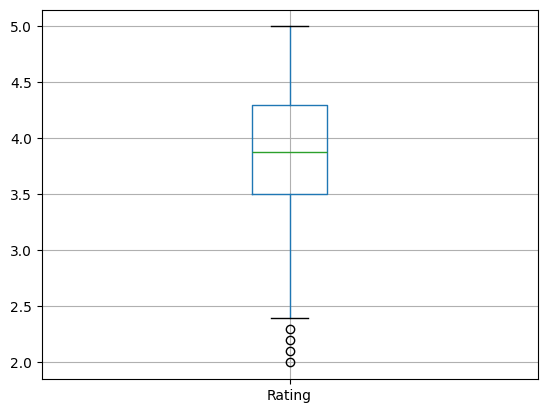

In [32]:
df[['Rating']].boxplot()

Based on the Box Plot, we can see that there's some data samples that lie under the lower whisker. By definition, they are outliers. However, I will not treat them as outlier since the `Rating` column ranging only from 1 to 5.

### Outlier in Founded Year

<Axes: >

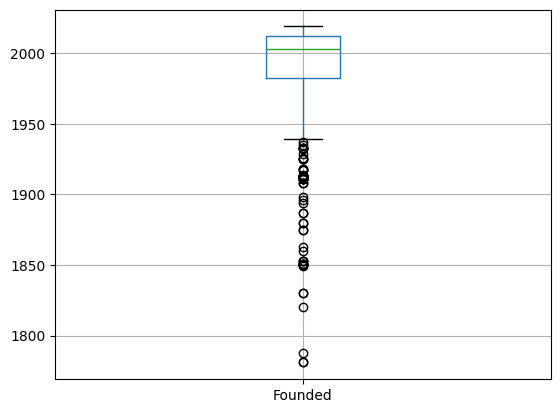

In [33]:
df[['Founded']].boxplot()

Wow, there are companies that founded before 1900 or even before 1800! Before suspecting those as outliers, we should check the validity of the data first. We can simply sample some companies and search them on Google.

In [34]:
df[df['Founded']<1850][['Company Name','Founded']]

,Company Name,Founded
45,Pfizer\n4.1,1849
51,Takeda\n3.7,1781
266,US Pharmacopeia\n3.2,1820
300,State of Virginia\n3.2,1788
321,GSK\n3.9,1830
365,Takeda\n3.7,1781
594,GSK\n3.9,1830


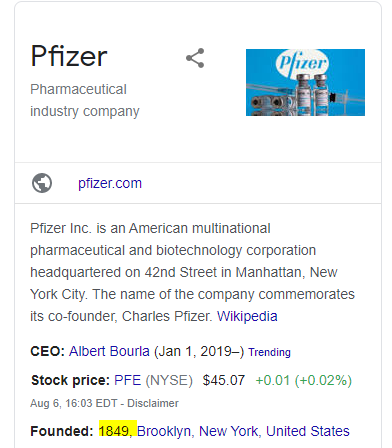

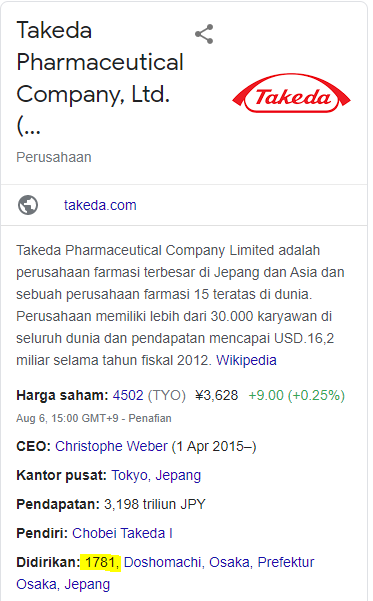

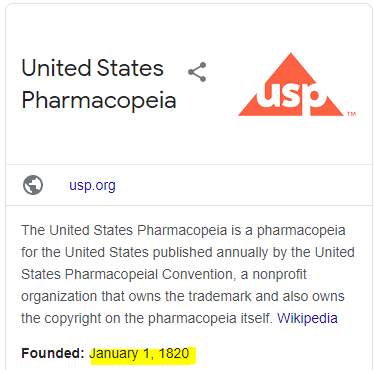

Turns out those are not outliers :)

### Ideas for Outlier Handling

We are lucky that we don't found any outlier in this dataset, but what if we faced with the data that consist outlier? Here are several ideas to handle outlier:

1. Remove outlier samples from our data
2. Cap outliers with the upper whisker value
3. Group outliers into 1 specific value, e.g. -1, or maximum + 100

## Data Type Checking

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, 0 to 671
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          659 non-null    object 
 1   Salary Estimate    659 non-null    object 
 2   Job Description    659 non-null    object 
 3   Rating             659 non-null    float64
 4   Company Name       659 non-null    object 
 5   Location           659 non-null    object 
 6   Headquarters       659 non-null    object 
 7   Size               659 non-null    object 
 8   Founded            659 non-null    int64  
 9   Type of ownership  659 non-null    object 
 10  Industry           659 non-null    object 
 11  Sector             659 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 66.9+ KB


# Data Preprocessing

## Categorical Data Encoding

When you wanted to build a ML model, it can only receives number as input, not a text or categorical features. That's why we have to change the categorical columns into numerical format. There are many ways to encode your categorical data, below are the encoding strategy that are often used in practice:

1. One Hot Encoding
2. Label Encoding
3. Target Encoding

### One Hot Encoding

Suitable for column that has no order / level information

In [36]:
pd.get_dummies(df['Size'])

,1 to 50 employees,10000+ employees,1001 to 5000 employees,201 to 500 employees,5001 to 10000 employees,501 to 1000 employees,51 to 200 employees
0,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False
3,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
667,False,False,True,False,False,False,False
668,False,False,False,False,False,False,True
669,False,False,False,False,False,False,True
670,True,False,False,False,False,False,False


In [37]:
pd.get_dummies(df['Size'],drop_first=True)

,10000+ employees,1001 to 5000 employees,201 to 500 employees,5001 to 10000 employees,501 to 1000 employees,51 to 200 employees
0,False,True,False,False,False,False
1,False,False,False,True,False,False
2,False,True,False,False,False,False
3,False,False,False,False,True,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
667,False,True,False,False,False,False
668,False,False,False,False,False,True
669,False,False,False,False,False,True
670,False,False,False,False,False,False


### Label Encoding

Suitable for column that has order / level info, e.g. `Size` column

In [38]:
def label_encoding_size_column(x):
    if x == '1 to 50 employees':
        return 0
    elif x== '51 to 200 employees':
        return 1
    elif x == '201 to 500 employees':
        return 2
    elif x == '501 to 1000 employees':
        return 3
    elif x == '1001 to 5000 employees':
        return 4
    elif x == '5001 to 10000 employees':
        return 5
    else:
        return 6

In [39]:
df['Size'].apply(label_encoding_size_column)

,Size
0,4
1,5
2,4
3,3
4,1
...,...
667,4
668,1
669,1
670,0


### Target Encoding

A really powerful encoding method when you want to build a classification/regression ML model.

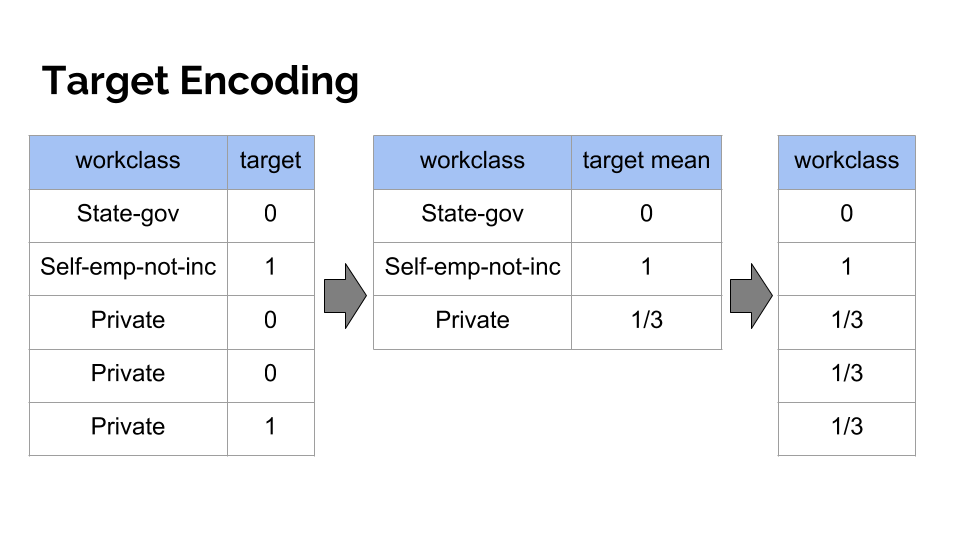

Source: https://www.kaggle.com/caesarlupum/catcomp-simple-target-encoding

## Numerical Data Scaling

When building a ML model, **especially the distance-based models**, we have to normalized/standardized our numerical variables first.

**Why?**

So that all of the features can get equal treatment by the ML model.

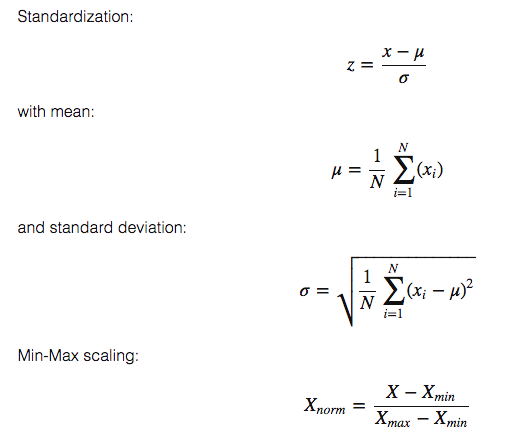

Source: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler

### Standard Scaling

A scaling method that aims to make the variable has zero mean and standard deviation of 1.

In [40]:
def standardized(series_col):
    return (series_col - series_col.mean()) / series_col.std()

In [41]:
df['Founded'].describe()

,Founded
count,659.000000
mean,1988.546282
std,38.642138
min,1781.000000
25%,1982.500000
50%,2003.000000
75%,2012.000000
max,2019.000000


In [42]:
standardized(df['Founded'])

,Founded
0,0.115255
1,-0.531707
2,-0.195286
3,0.296405
4,0.244648
...,...
667,0.011742
668,0.606947
669,0.606947
670,0.606947


In [43]:
standardized(df['Founded']).describe()

,Founded
count,6.590000e+02
mean,-2.690143e-15
std,1.000000e+00
min,-5.370983e+00
25%,-1.564686e-01
50%,3.740403e-01
75%,6.069467e-01
max,7.880961e-01


### Min-Max Normalization

A scaling method that aims to make the variable bounded within specified range. Usually between 0 and 1.

In [44]:
def min_max(series_col):
    return (series_col - series_col.min()) / (series_col.max()-series_col.min())

In [45]:
min_max(df['Founded'])

,Founded
0,0.890756
1,0.785714
2,0.840336
3,0.920168
4,0.911765
...,...
667,0.873950
668,0.970588
669,0.970588
670,0.970588


In [46]:
min_max(df['Founded']).describe()

,Founded
count,659.000000
mean,0.872043
std,0.162362
min,0.000000
25%,0.846639
50%,0.932773
75%,0.970588
max,1.000000


## Feature Selection

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

X.head(), y.head()


(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

baseline_clf = LogisticRegression(max_iter=1000)
baseline_clf.fit(X_train, y_train)
y_pred_base = baseline_clf.predict(X_test)
print("Baseline accuracy:", accuracy_score(y_test, y_pred_base))


Baseline accuracy: 0.9666666666666667


In [50]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=2)   # pilih 2 fitur terbaik
selector.fit(X_train, y_train)

# Lihat skor tiap fitur
scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print(scores)

# Transform data
X_train_k = selector.transform(X_train)
X_test_k  = selector.transform(X_test)


petal length (cm)    948.890381
petal width (cm)     803.214088
sepal length (cm)    100.965923
sepal width (cm)      36.030577
dtype: float64


In [51]:
clf_k = LogisticRegression(max_iter=1000)
clf_k.fit(X_train_k, y_train)
y_pred_k = clf_k.predict(X_test_k)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy (SelectKBest k=2):", accuracy_score(y_test, y_pred_k))
print(classification_report(y_test, y_pred_k, target_names=iris.target_names))


Accuracy (SelectKBest k=2): 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [52]:
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
print("Fitur terpilih:", list(selected_features))

Fitur terpilih: ['petal length (cm)', 'petal width (cm)']


## Feature Extraction

In [53]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Baseline accuracy:", accuracy_score(y_test, y_pred))

Baseline accuracy: 0.9666666666666667


In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardisasi penting sebelum PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA dengan 2 komponen
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.72677234 0.23066667]


In [57]:
clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

print("Accuracy (PCA, 2 komponen):", accuracy_score(y_test, y_pred_pca))

Accuracy (PCA, 2 komponen): 0.9


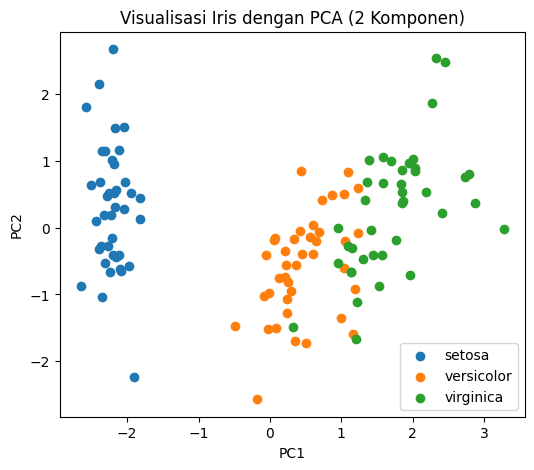

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(
        X_train_pca[y_train==i, 0],
        X_train_pca[y_train==i, 1],
        label=target_name
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi Iris dengan PCA (2 Komponen)")
plt.legend()
plt.show()

# Others

Last but not least, we can clean other stuff on our dataset as well, e.g. normalize text column value

## Job Title

In [59]:
df['Job Title'].value_counts().head(50)

,count
Job Title,
Data Scientist,326
Data Engineer,26
Senior Data Scientist,19
Machine Learning Engineer,15
Data Analyst,12
Senior Data Analyst,6
Senior Data Engineer,4
ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR,4
Data Science Software Engineer,4


In [60]:
df['Job Title'].value_counts().tail(50)

,count
Job Title,
NGS Scientist,1
Applied Technology Researcher / Data Scientist,1
Data Analyst/Engineer,1
Data Integration and Modeling Engineer,1
AI Data Scientist,1
"Development Scientist, Voltaren",1
Data Scientist Machine Learning,1
Chief Scientist,1
"Manager / Lead, Data Science & Analytics",1


In [61]:
def clean_job_title(x):
    if 'data scientist' in x.lower():
        return 'data scientist'
    elif 'data engineer' in x.lower():
        return 'data engineer'
    elif 'machine learning engineer' in x.lower():
        return 'ml engineer'
    elif 'data analyst' in x.lower():
        return 'data analyst'
    elif 'machine learning scientist' in x.lower():
        return 'ml scientist'
    elif 'business intelligence' in x.lower():
        return 'business intelligence'
    elif 'research scientist' in x.lower():
        return 'research scientist'
    elif 'data science manager' in x.lower():
        return 'data science manager'
    else:
        return 'others'


df['Job Title'] = df['Job Title'].apply(clean_job_title)

/tmp/ipython-input-2111123485.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].apply(clean_job_title)


In [62]:
df['Job Title'].value_counts()

,count
Job Title,
data scientist,444
others,79
data analyst,47
data engineer,46
ml engineer,20
ml scientist,11
business intelligence,6
research scientist,4
data science manager,2


## Salary Estimate

In [63]:
df['Salary Estimate'].value_counts()

,count
Salary Estimate,
$75K-$131K (Glassdoor est.),32
$79K-$131K (Glassdoor est.),32
$99K-$132K (Glassdoor est.),32
$137K-$171K (Glassdoor est.),30
$90K-$109K (Glassdoor est.),28
$56K-$97K (Glassdoor est.),22
$90K-$124K (Glassdoor est.),22
$79K-$106K (Glassdoor est.),22
$101K-$165K (Glassdoor est.),21


In [64]:
def get_mean_salary(text):
    '''Function to extract the mean of the salary range
    '''
    nums = re.findall(r'[0-9]+',text) #get all numbers
    nums = [int(x) for x in nums] #convert into integer
    return np.mean(nums)

In [65]:
df['Salary Estimate'] = df['Salary Estimate'].apply(get_mean_salary)

/tmp/ipython-input-1777446272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary Estimate'] = df['Salary Estimate'].apply(get_mean_salary)


## Company Name

In [66]:
df['Company Name']

,Company Name
0,Healthfirst\n3.1
1,ManTech\n4.2
2,Analysis Group\n3.8
3,INFICON\n3.5
4,Affinity Solutions\n2.9
...,...
667,TRANZACT\n3.6
668,JKGT
669,AccessHope
670,ChaTeck Incorporated\n5.0


In [67]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

/tmp/ipython-input-2917893684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])


In [68]:
df['Company Name']

,Company Name
0,Healthfirst
1,ManTech
2,Analysis Group
3,INFICON
4,Affinity Solutions
...,...
667,TRANZACT
668,JKGT
669,AccessHope
670,ChaTeck Incorporated


# Final Cleaned Data

In [69]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector
0,data scientist,154.0,Description\n\nThe Senior Data Scientist is re...,3.100000,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance
1,data scientist,154.0,"Secure our Nation, Ignite your Future\n\nJoin ...",4.200000,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services
2,data scientist,154.0,Overview\n\n\nAnalysis Group is one of the lar...,3.800000,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services
3,data scientist,154.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.500000,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing
4,data scientist,154.0,Data Scientist\nAffinity Solutions / Marketing...,2.900000,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services
...,...,...,...,...,...,...,...,...,...,...,...,...
667,data scientist,136.0,Summary\n\nWe’re looking for a data scientist ...,3.600000,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services
668,data scientist,136.0,Job Description\nBecome a thought leader withi...,3.881833,JKGT,"San Francisco, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
669,data scientist,136.0,Join a thriving company that is changing the w...,3.881833,AccessHope,"Irwindale, CA","New York, NY",51 to 200 employees,2012,Company - Private,Biotech & Pharmaceuticals,Information Technology
670,data scientist,136.0,100 Remote Opportunity As an AINLP Data Scient...,5.000000,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,2012,Company - Private,Advertising & Marketing,Business Services


# Save Cleaned Data

In [ ]:
df.to_csv('Cleaned_DS_jobs.csv',index=False)

# Closing Statement

Again, I want to stress that **you can't know everything**!


If you found any issue or forget some of the syntax, it is okay and acceptable. You can just search anything on Google and Stack Overflow.


The important thing is you have to know what are the things you want to search!